In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop,Adagrad
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.metrics import cohen_kappa_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [39]:
np.random.seed(7)
data= np.loadtxt('grayscale.csv', delimiter=',', dtype='float32')
label=np.loadtxt('encodedlabel.csv',delimiter=',',dtype='float32')
print(data.shape)
Accu=[]

(2972, 20)


In [40]:
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.20, random_state=42)
print(train_data.shape, train_label.shape,test_data.shape, test_label.shape)
kfold = KFold(6, False, 1)
for train, test in kfold.split(data):
    
    print('fold',kfold)
    print('train: %s, test: %s' % (data[train], data[test]))
    train_data= data[train].reshape(train.shape[0],5,4)
    test_data= data[test].reshape(test.shape[0],5,4)
    train_label=label[train]
    test_label=label[test]
    print(train_data.shape, train_label.shape,test_data.shape, test_label.shape)
    
    model= Sequential()
    model.add(Conv1D(strides=1, input_shape=(5,4), padding="same", activation="tanh", filters=32,kernel_size=2)),
    model.add(Flatten())

    model.add(Dense(128, input_dim=20, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))

    adam=Adam(lr=0.001)

    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

    print(model.summary())

    model.fit(train_data, train_label, epochs=10, batch_size=None,validation_split=0.2)

    scores= model.evaluate(test_data,test_label)
    print("Accuracy:",scores[1]*100)
    pred=model.predict(test_data)
    cm=confusion_matrix(test_label.argmax(axis=1),pred.argmax(axis=1))
    print("Confusion Matrix")
    print(cm)


    PN=(np.float(cm[0][0])/np.float(np.sum(cm[:,0])))
    PD=(np.float(cm[1][1])/np.float(np.sum(cm[:,1])))
    PP=(np.float(cm[2][2])/np.float(np.sum(cm[:,2])))

    print('Precision(Normal)',PN)
    print('Precision(DOS)',PD)
    print('Precision(Probe)',PP)

    RN=(np.float(cm[0][0])/np.float(np.sum(cm[0,:])))
    RD=(np.float(cm[1][1])/np.float(np.sum(cm[1,:])))
    RP=(np.float(cm[2][2])/np.float(np.sum(cm[2,:])))
    print('Recall(Normal)',RN)
    print('Recall(DOS)',RD)
    print('Recall(Probe)',RP)
    
    FSN=2*(PN*RN)/(PN+RN)
    FSD=2*(PD*RD)/(PD+RD)
    FSP=2*(PP*RP)/(PP+RP)
    print('FScore(Normal)',FSN)
    print('FScore(DOS)',FSD)
    print('FScore(Probe)',FSP)

    kappa_score=cohen_kappa_score(test_label.argmax(axis=1),pred.argmax(axis=1))
    print('kappa_score',kappa_score)
    Accu.append(float(scores[1]))
    
    
    

(2377, 20) (2377, 3) (595, 20) (595, 3)
fold KFold(n_splits=6, random_state=1, shuffle=False)
train: [[ 4.  1.  8. ...  0.  0.  0.]
 [ 2.  8.  8. ...  0.  0.  0.]
 [ 0. 65.  0. ...  0.  0.  0.]
 ...
 [ 4.  1.  8. ...  0.  0.  0.]
 [ 2.  0. 72. ...  0.  0.  0.]
 [ 4.  1.  8. ...  0.  0.  0.]], test: [[128.   1.   0. ...   0.   0.   0.]
 [  0.  65.   0. ...   0.   0.   0.]
 [  0.  65.   0. ...   0.   0.   0.]
 ...
 [  0.  65.   0. ...   0.   0.   0.]
 [  0.  65.   0. ...   0.   0.   0.]
 [  2.   4.   8. ...   0.   0.   0.]]
(2476, 5, 4) (2476, 3) (496, 5, 4) (496, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_49 (Conv1D)           (None, 5, 32)             288       
_________________________________________________________________
flatten_49 (Flatten)         (None, 160)               0         
_________________________________________________________________
dense_97 (Dense)             (No

[0.9758064516129032, 0.9798387096774194, 0.9717171718375851, 0.9777777777777777, 0.9696969698173831, 0.9737373737373738]


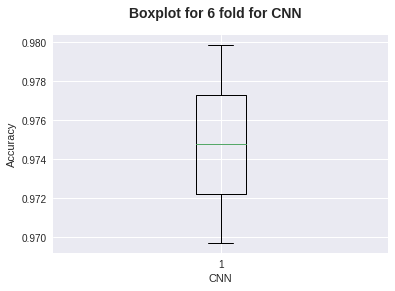

In [41]:
print(Accu)
fig = plt.figure()
fig.suptitle('Boxplot for 6 fold for CNN', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(Accu)
ax.set_xlabel('CNN')
ax.set_ylabel('Accuracy')

plt.show()
matplotlib.rc("lines", markeredgewidth=1)